In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df=pd.read_csv("hotel_bookings.csv")

In [17]:
df.columns
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [24]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [32]:

missing_values = df.isnull().sum()
missing_precentage=(missing_values/len(df))*100
missing_data=pd.DataFrame({"missing_values":missing_values,"missing_precentage":missing_precentage})
print(missing_data)

                                missing_values  missing_precentage
hotel                                        0            0.000000
is_canceled                                  0            0.000000
lead_time                                    0            0.000000
arrival_date_year                            0            0.000000
arrival_date_month                           0            0.000000
arrival_date_week_number                     0            0.000000
arrival_date_day_of_month                    0            0.000000
stays_in_weekend_nights                      0            0.000000
stays_in_week_nights                         0            0.000000
adults                                       0            0.000000
children                                     4            0.003350
babies                                       0            0.000000
meal                                         0            0.000000
country                                    488            0.40

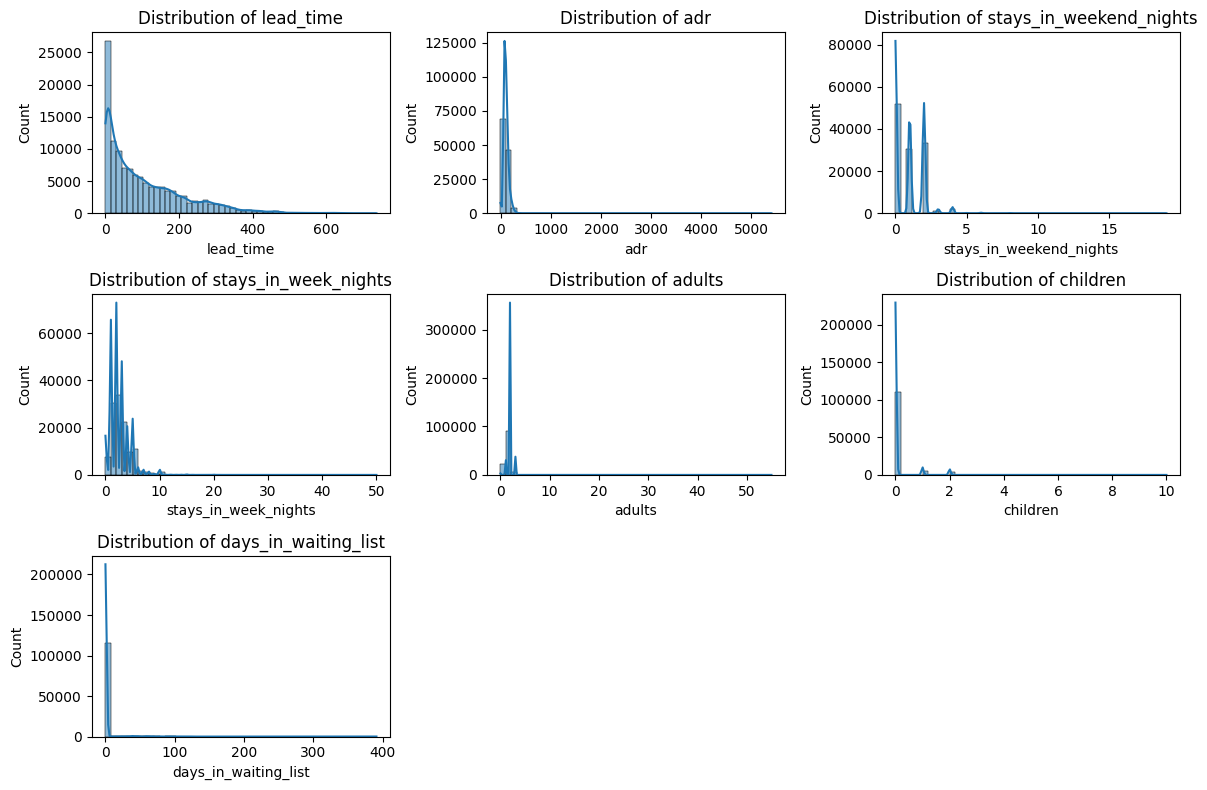

In [45]:
num_cols = ["lead_time", "adr", "stays_in_weekend_nights",
            "stays_in_week_nights", "adults", "children","days_in_waiting_list" ]

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=50)  # kde=True adds smooth curve
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [62]:
def remove_outliers(df,column):
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  iqr=q3-q1
  lower=q1-1.5*iqr
  upper=q3+1.5*iqr
  outliers = df[(df[col] < lower) | (df[col] > upper)]
  return len(outliers), lower, upper


In [63]:
outliers_report={}
for col in num_cols:
  outliers,lower,upper=remove_outliers(df,col)
  outliers_report[col]={"number of outliers": outliers,"lower bound":lower,"upper bound":upper}
outliers_df=pd.DataFrame(outliers_report).T
print(outliers_df)

                         number of outliers  lower bound  upper bound
lead_time                            3005.0     -195.000      373.000
adr                                  3793.0      -15.775      211.065
stays_in_weekend_nights               265.0       -3.000        5.000
stays_in_week_nights                 3354.0       -2.000        6.000
adults                              29710.0        2.000        2.000
children                             8590.0        0.000        0.000
days_in_waiting_list                 3698.0        0.000        0.000


**Second phase**

In [77]:
df['company']=df["company"].fillna(0)
df['agent']=df["agent"].fillna("none")
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [86]:
df["country"].value_counts()

,count
country,
PRT,49078
GBR,12129
FRA,10415
ESP,8568
DEU,7287
...,...
MRT,1
KIR,1
SDN,1


In [233]:
df["country"]=df["country"].fillna("PRT")
df1=df.copy()
df1['children'].fillna(df1['children'].mean())


,children
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
119385,0.0
119386,0.0
119387,0.0
119388,0.0


In [234]:
df1.duplicated().sum()

np.int64(32013)

In [235]:
df1 = df1.drop_duplicates()
df1.duplicated().sum()
print(df1["adr"].max())

5400.0


In [236]:
df1["adr"]=df["adr"].copy()
df1["adr"] = df1["adr"].clip(upper=1000)
df1["adr"] = df1["adr"].clip(lower=0)


In [237]:
print(df1["adr"].max())
print(df1["adr"].min())


1000.0
0.0


In [238]:
df1['reservation_status_date']=pd.to_datetime(df1["reservation_status_date"])

In [239]:
df1["reservation_status_date"]

,reservation_status_date
0,2015-07-01
1,2015-07-01
2,2015-07-02
3,2015-07-02
4,2015-07-03
...,...
119385,2017-09-06
119386,2017-09-07
119387,2017-09-07
119388,2017-09-07


In [240]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87377 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87377 non-null  object        
 1   is_canceled                     87377 non-null  int64         
 2   lead_time                       87377 non-null  int64         
 3   arrival_date_year               87377 non-null  int64         
 4   arrival_date_month              87377 non-null  object        
 5   arrival_date_week_number        87377 non-null  int64         
 6   arrival_date_day_of_month       87377 non-null  int64         
 7   stays_in_weekend_nights         87377 non-null  int64         
 8   stays_in_week_nights            87377 non-null  int64         
 9   adults                          87377 non-null  int64         
 10  children                        87373 non-null  float64       
 11  babies

Features

In [241]:
df1['total_guests']=df1['adults']+df1['babies']+df1['children']
df1['total_nights']=df1['stays_in_weekend_nights']+df1['stays_in_week_nights']
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2


In [242]:
df1=df1[~((df1['reservation_status']=="Check-Out") & (df1['total_nights']==0))]
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_nights
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03,2.0,2
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03,2.0,2


In [243]:
df1.shape
df1['reservation_status'].value_counts()

,count
reservation_status,
Check-Out,62731
Canceled,23010
No-Show,1014


In [244]:
df1["is_family"] = (df1["children"] + df1["babies"] > 0)
df1["is_family"].value_counts()

,count
is_family,
False,77690
True,9065


In [245]:
df1 = df1.drop(['reservation_status', 'reservation_status_date'], axis=1)

In [246]:
print(df1["meal"].unique())
df1["meal"]=df1["meal"].replace("Undefined","SC")
df1["meal"].value_counts()

['BB' 'FB' 'HB' 'SC' 'Undefined']


,count
meal,
BB,67463
SC,9901
HB,9032
FB,359


In [247]:
df1['BB']=(df1['meal']=='BB')*1
df1['HB']=(df1['meal']=='HB')*1
df1['FB']=(df1['meal']=='FB')*1
df1['SC']=(df1['meal']=='SC')*1

I deleted the meal column but i run it again so it gives me error

In [248]:
df1["market_segment"].value_counts()

,count
market_segment,
Online TA,51333
Offline TA/TO,13767
Direct,11671
Groups,4907
Corporate,4161
Complementary,691
Aviation,223
Undefined,2


In [249]:
low_cardinality = ['market_segment', 'distribution_channel']
df1 = pd.get_dummies(df1 , columns= low_cardinality, drop_first= True)

In [250]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,False,True,False,False,False,False,True,False,False,False
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,True,False,False,False,False,False,False,False,False,False
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,False,False,False,False,True,False,False,False,True,False
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,False,True,False,False,False,False,True,False,False,False
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,False,True,False,False,False,False,True,False,False,False


the code run well but i press run again aftewr i remove the country column so it doesnot workk

In [251]:

threshold = 5000
country_counts = df1['country'].value_counts()
top_countries = country_counts[country_counts >= threshold].index

# Replace countries with low count by "Other"
df1['country_grouped'] = df1['country'].apply(lambda x: x if x in top_countries else 'Other')

In [252]:
df1.drop('country', axis=1, inplace=True)
df1['country_grouped'].value_counts()


,count
country_grouped,
Other,27544
PRT,27354
GBR,10410
FRA,8825
ESP,7236
DEU,5386


In [255]:

X = df1.drop(['is_canceled'], axis=1)  # All columns except the target
y = df1['is_canceled']                 # Target column
#df1.head()

In [256]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% of data for testing, 80% for training
    random_state=42     # ensures reproducibility
)


In [257]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(69404, 45) (17351, 45)
(69404,) (17351,)


Overall Cancellation Rate: 27.69%
Average Lead Time (days): 80.26
Average Daily Rate (ADR): 107.06

Top 5 Countries by Bookings (excluding 'Other'):
country_grouped
PRT    27354
GBR    10410
FRA     8825
ESP     7236
DEU     5386
Name: count, dtype: int64

Bookings via Online Travel Agencies: 51333
Average Guests per Booking: 2.03


/tmp/ipython-input-2751126452.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=df1, palette='Set2')


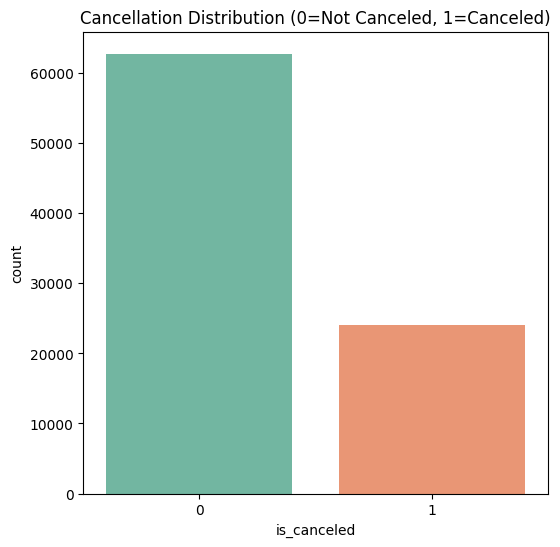

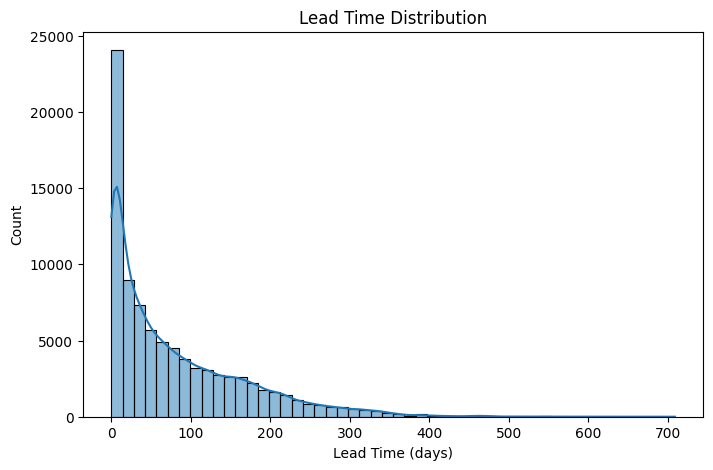

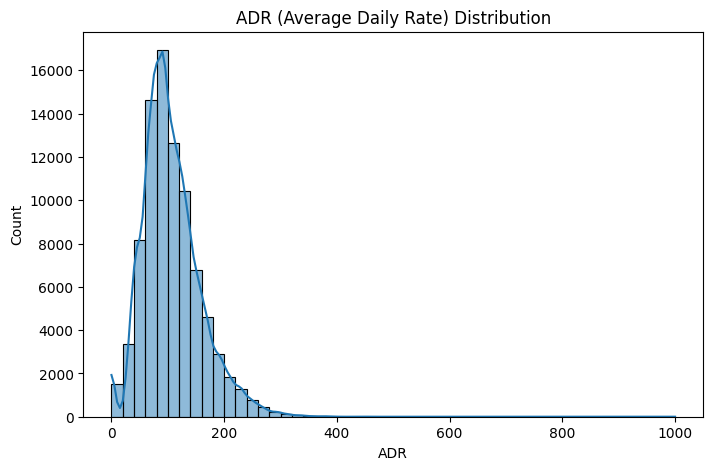

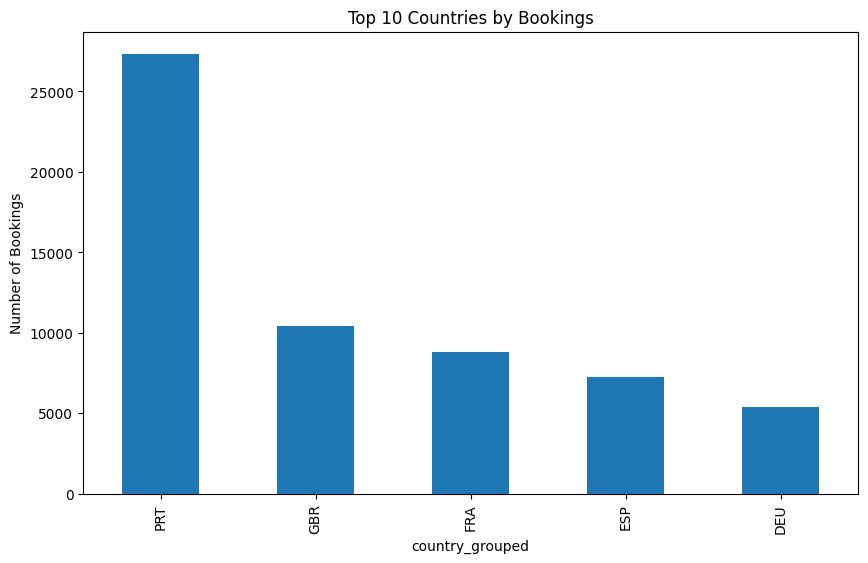

In [260]:
cancellation_rate = df1['is_canceled'].mean() * 100
print(f"Overall Cancellation Rate: {cancellation_rate:.2f}%")

avg_lead_time = df1['lead_time'].mean()
print(f"Average Lead Time (days): {avg_lead_time:.2f}")

avg_adr = df1['adr'].mean()
print(f"Average Daily Rate (ADR): {avg_adr:.2f}")

# Exclude 'Other'
country_counts = df1[df1['country_grouped'] != 'Other']['country_grouped'].value_counts().head(5)

# Print results
print("\nTop 5 Countries by Bookings (excluding 'Other'):")
print(country_counts)


top_segment = df1['market_segment_Online TA'].sum()
print(f"\nBookings via Online Travel Agencies: {top_segment}")

avg_guests = df1['total_guests'].mean()
print(f"Average Guests per Booking: {avg_guests:.2f}")

plt.figure(figsize=(6,6))
sns.countplot(x='is_canceled', data=df1, palette='Set2')
plt.title("Cancellation Distribution (0=Not Canceled, 1=Canceled)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df1['lead_time'], bins=50, kde=True)
plt.title("Lead Time Distribution")
plt.xlabel("Lead Time (days)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df1['adr'], bins=50, kde=True)
plt.title("ADR (Average Daily Rate) Distribution")
plt.xlabel("ADR")
plt.show()
plt.figure(figsize=(10,6))
country_counts.head(10).plot(kind='bar')
plt.title("Top 10 Countries by Bookings")
plt.ylabel("Number of Bookings")
plt.show()
